<div align="center">

# Организация кластера в виде иерархического дерева 

</div>

---


# Иерархическая кластеризация (Hierarchical Clustering)

## Основные идеи

* **Цель**: выявление вложенной структуры кластеров.
* Результат можно изобразить в виде **дендрограммы** — дерева слияний/разделений кластеров.
* **Преимущество**: не нужно заранее задавать число кластеров $k$.
* Два главных подхода:

  * **Divisive (разделительная)**: сверху вниз (один большой кластер → дробим до одиночных точек).
  * **Agglomerative (агломеративная)**: снизу вверх (каждая точка — кластер → объединяем до единого кластера).


## Агломеративная кластеризация (bottom-up)

### **Single linkage (одиночная связь)**

* Сравниваются **самые близкие точки** между кластерами.
* Объединяются те два кластера, где минимальное расстояние между элементами минимально.
* ❗ Минус: возможен эффект «цепочек» (chaining).

### **Complete linkage (полная связь)**

* Сравниваются **самые далёкие точки** между кластерами.
* Объединяются те два кластера, где максимальное расстояние между элементами минимально.
* ✅ Кластеры получаются более компактными и «круглыми».

### **Average linkage (средняя связь)**

* Сравнивается **среднее расстояние** между всеми парами точек из двух кластеров.
* Более сбалансированный вариант.

### **Ward’s linkage (связь Уорда)**

* На каждом шаге объединяются кластеры, при которых минимально увеличивается внутрикластерная SSE (вариация).
* ✅ Чаще всего даёт хорошие результаты.


## 🔹 Алгоритм агломеративной кластеризации (для complete linkage)

1. Вычислить матрицу попарных расстояний всех точек.
2. Каждую точку представить как отдельный кластер.
3. Найти два ближайших кластера по критерию **полной связи** (наименьшее расстояние между наиболее непохожими элементами).
4. Объединить эти кластеры.
5. Обновить матрицу расстояний.
6. Повторять шаги 3–5, пока не останется один кластер.


## 🔹 Визуализация

* Основной инструмент анализа — **дендрограмма**:

  * ось $x$: объекты,
  * ось $y$: расстояния (или прирост ошибки) при слиянии.
* Можно «обрезать» дендрограмму на нужной высоте, чтобы получить разумное число кластеров.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
from sklearn.cluster import AgglomerativeClustering

In [11]:
# Пример работы алгоритма на сгенерированных данных, где
# ID - идентификаторы наблюдения, а X,Y,Z - признаки.
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [16]:
# Алгоритм агломеративной кластеризации полной связи
# Вычисление матрицы расстояний, используемая в качестве 
# входных данных для алгоритма
row_dist = pd.DataFrame(squareform(
                        pdist(df, metric = 'euclidean')),
                        columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


> так мы получили симетричную матрицу парных расстояний после вычисления евклидово расстояния между каждой парой входных признаков.

---


### 🔹 Функция `linkage` (из `scipy.cluster.hierarchy`)

* Делает агломеративную кластеризацию и возвращает **матрицу связей (linkage matrix)**, которую потом можно отобразить в виде дендрограммы.
* Входные данные:

  1. **Сжатая матрица расстояний** (`pdist`) ✅
  2. **Исходный массив данных** (объекты × признаки) ✅
  3. ❌ **Нельзя** подавать квадратную матрицу расстояний (иначе будут искажённые результаты).

### 🔹 Для анализа

* `row_clusters` → это **матрица связей**
* Её удобно превратить в `pandas.DataFrame`, чтобы наглядно видеть порядок объединений.



In [17]:
# Сжатая матрица расстояний
row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')


In [18]:
# Результаты кластеризации 
pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = [f'cluster {(i + 1)}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


Каждая строка этой матрицы представляет одно слияние. Первый и второй столбцы - наиболее непохожие элементы в каждом кластере, третий столбце - расстояние между этими элементами, а четвертый столбец - содержит кол-во элементов в каждом кластере.

<function matplotlib.pyplot.show(close=None, block=None)>

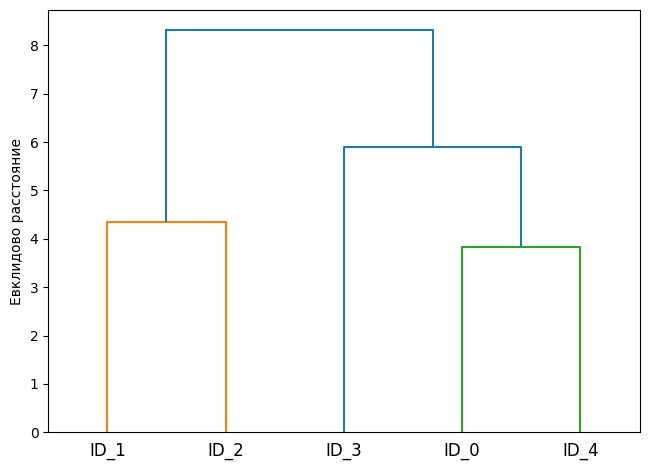

In [21]:
# Представление результатов в виде дендрограммы
row_dendr = dendrogram(
    row_clusters,
    labels = labels
)
plt.tight_layout()
plt.ylabel('Евклидово расстояние')
plt.show

Данная дендограмма отображает в общем виде различные кластеры, образовавшиеся в ходе алгомеративной иерархической кластеризации.

---

<div align="center">

# Приклепление дендрограмм к тепловой карте 

</div>

---


### 🔹 Шаги построения

1. **Создать дендрограмму сбоку**

   * через `matplotlib` задать `add_axes`,
   * повернуть на 90° (чтобы строки шли сверху вниз).

2. **Переупорядочить строки данных**

   * взять порядок из `dendrogram()['leaves']`,
   * применить его к `DataFrame`.

3. **Построить тепловую карту**

   * `plt.matshow()` или `seaborn.heatmap()`
   * расположить её рядом с дендрограммой.

4. **Настроить внешний вид**

   * убрать оси у дендрограммы,
   * добавить цветовую шкалу (`plt.colorbar()`),
   * подписать оси (названия признаков и объектов).

В итоге получится:

* слева **дендрограмма строк**,
* справа **тепловая карта**,
* строки в тепловой карте упорядочены по структуре кластеров.

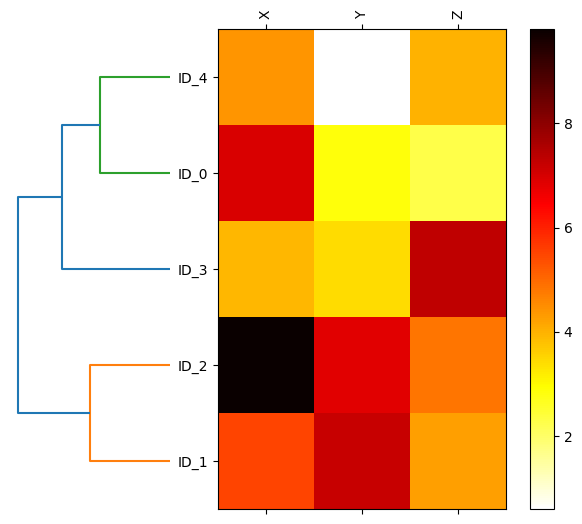

In [25]:
# 1) Создание дендрограммы сбоку
fig = plt.figure(figsize = (8, 8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,
                       orientation = 'left')

# 2) Переупорядочить строки данных
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 3) Построить тепловую карту
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation = 'nearest',
                  cmap = 'hot_r')

# 4) Настройка внешего вида
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)

# сначала задать позиции, потом метки
axm.set_xticks(range(len(df_rowclust.columns)))
axm.set_xticklabels(df_rowclust.columns, rotation=90)

axm.set_yticks(range(len(df_rowclust.index)))
axm.set_yticklabels(df_rowclust.index)

plt.show()

### Ближайшие объекты

1. **ID\_2 и ID\_1**

   * Они объединились первыми (оранжевая ветка дендрограммы).
   * Почему? У них похожие значения по признакам **X** и **Z** (оба примерно оранжевые), хотя по **Y** есть отличие (у ID\_2 красный, у ID\_1 тёмно-красный).
   * То есть в среднем они ближе друг к другу, чем к другим объектам.

2. **ID\_4 и ID\_0**

   * Они тоже образовали свою пару (зелёная ветка).
   * У них оба высокие значения по **Z** (жёлто-оранжевый), и примерно средние по **X**.
   * Отличие по **Y** (ID\_4 — белый = очень большое значение, ID\_0 — жёлтый = тоже большое), но в целом они ближе друг к другу.

3. **ID\_3**

   * Он присоединился к паре `ID_4 + ID_0`.
   * У него похожие значения по **X** и **Y**, но отличается по **Z** (тёмно-красный).

4. **Все вместе**

   * В итоге, дендрограмма показывает, что у нас есть два основных кластера:

     * кластер `(ID_2, ID_1)`
     * кластер `(ID_4, ID_0, ID_3)`.

Таким образом:

* **(ID\_2, ID\_1)** — близкая пара.
* **(ID\_4, ID\_0, ID\_3)** — другая группа, внутри которой ID\_4 и ID\_0 ближе друг к другу, чем к ID\_3.

---

<div align="center">

# Агломеративная кластеризация с помощью scikit-learn

</div>

---

## Основные моменты

* `AgglomerativeClustering` реализует **агломеративный подход**.
* Отличие от SciPy:

  * **Можно сразу указать количество кластеров `n_clusters`**, т.е. «обрезать» дерево на нужной высоте.
  * Не нужно вручную работать с дендрограммой для выделения кластеров.

## Настройки

* **n\_clusters** — число итоговых кластеров после слияния.
* **linkage** — тип связи между кластерами:

  * `'complete'` — максимальное расстояние между точками (полная связь)
  * `'single'` — минимальное расстояние (одиночная связь)
  * `'average'` — среднее расстояние
  * `'ward'` — минимизация внутрикластерной SSE
* **metric** — метрика расстояния, обычно `'euclidean'` для полной связи.

## В результате

* В этом примере входные данные `X` будут распределены в **3 кластера**.
* Результат `labels` — массив меток кластера для каждой точки данных.

Метки кластеров: [1 0 0 2 1]


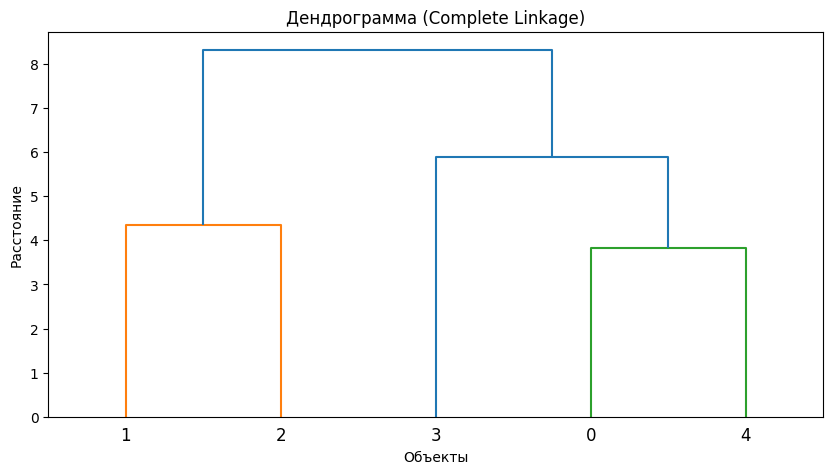

In [33]:
ac = AgglomerativeClustering(n_clusters = 3,
                             metric = 'euclidean',
                             linkage = 'complete')
labels = ac.fit_predict(X)
print(f'Метки кластеров: {labels}')



# Построение дендрограммы через scipy
Z = linkage(X, method='complete', metric='euclidean')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Дендрограмма (Complete Linkage)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")
plt.show()


По предсказанным меткам кластеров видно, что:

* Первый и пятый примеры (`ID_0` и `ID_4`) объединены в один кластер (метка 1).
* Примеры `ID_1` и `ID_2` образуют другой кластер (метка 0).
* Пример `ID_3` выделен в отдельный кластер (метка 2).

В целом, распределение соответствует наблюдаемой **дендрограмме**.